# 비디오 프레임이 시간에 따라 어떻게 바뀌는가?

## 공통

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from color_model import read_image_from_filelist, make_symlink
import seaborn as sns
import cv2

sns.set()

# read image
filelist='data/filelist-act4.txt'

images, filepath=read_image_from_filelist(filelist)

## Histogram

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10, 202, 206,
       207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


1.9512347e-06

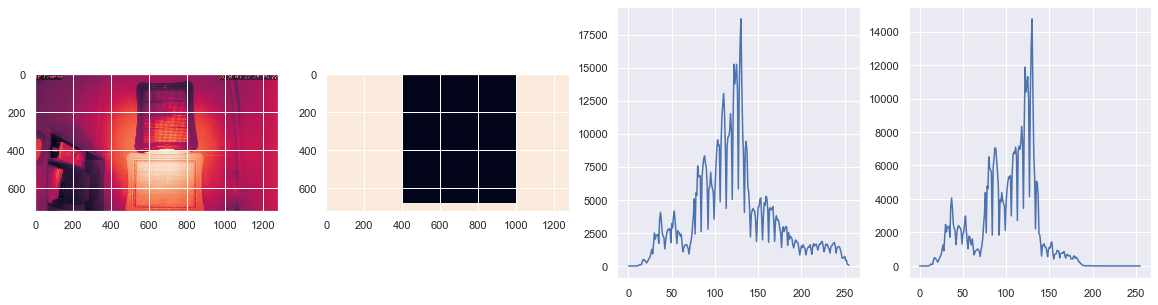

In [22]:
import imutils

frame=images[0]
frame2 = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
# frame2 = imutils.resize(frame2, int(frame.shape[0] * 0.5))
frame2 = cv2.medianBlur(frame2, 5)

roi = [404, 0, 1006, 680]
# roi = (np.array([404, 0, 1006, 680])*0.5).astype('uint32')
mask=None
if roi is not None:
    mask_bg=np.ones_like(frame2)*255
    mask_bg[roi[1]:roi[3], roi[0]:roi[2]]=0
    mask=mask_bg
    
print(mask)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(frame2)

plt.subplot(1, 4, 2)
plt.imshow(mask)

hist = cv2.calcHist([frame2], [0], None, [256], [0, 256])
plt.subplot(1, 4, 3)
plt.plot(hist)

hist = cv2.calcHist([frame2], [0], mask, [256], [0, 256])
plt.subplot(1, 4, 4)
plt.plot(hist)

# 확률이 0 인 픽셀에 작은 값을 주자
print(np.where(hist==0))
hist+=1
print(np.where(hist==0))
hist /= hist.sum()
print(np.where(hist==0))
hist.min()

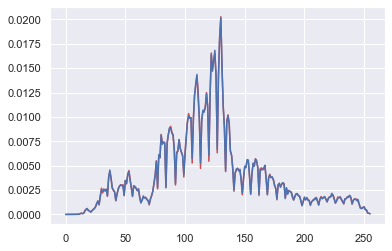

In [23]:
from scenemodel import SceneModel
from scipy.special import kl_div

sc=SceneModel()

i=0
hist_prev=sc.extract_feature(images[i]).transpose(); i+=1
hist_curr=sc.extract_feature(images[i]).transpose()

plt.subplot(1, 1, 1)
plt.plot(hist_prev, 'r')
# plt.subplot(2, 1, 2)
plt.plot(hist_curr, 'b')

# print(np.sum(kl_div(hist_prev, hist_curr)))

KLD(data/act4/frame-0024.jpg, data/act4/frame-0025.jpg) = 0.007
KLD(data/act4/frame-0048.jpg, data/act4/frame-0049.jpg) = 0.007
KLD(data/act4/frame-0072.jpg, data/act4/frame-0073.jpg) = 0.007
KLD(data/act4/frame-0096.jpg, data/act4/frame-0097.jpg) = 0.006
KLD(data/act4/frame-0120.jpg, data/act4/frame-0121.jpg) = 0.006
KLD(data/act4/frame-0144.jpg, data/act4/frame-0145.jpg) = 0.007
KLD(data/act4/frame-0168.jpg, data/act4/frame-0169.jpg) = 0.007
KLD(data/act4/frame-0192.jpg, data/act4/frame-0193.jpg) = 0.006
KLD(data/act4/frame-0216.jpg, data/act4/frame-0217.jpg) = 0.006
KLD(data/act4/frame-0240.jpg, data/act4/frame-0241.jpg) = 0.007
KLD(data/act4/frame-0264.jpg, data/act4/frame-0265.jpg) = 0.006
KLD(data/act4/frame-0288.jpg, data/act4/frame-0289.jpg) = 0.007
KLD(data/act4/frame-0312.jpg, data/act4/frame-0313.jpg) = 0.007
KLD(data/act4/frame-0336.jpg, data/act4/frame-0337.jpg) = 0.007
KLD(data/act4/frame-0360.jpg, data/act4/frame-0361.jpg) = 0.007
KLD(data/act4/frame-0384.jpg, data/act4/

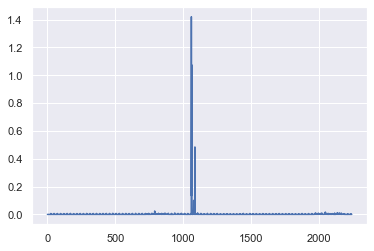

In [24]:
np.set_printoptions(precision=3)

n=len(images)

s=0
e=n

# s=6
# e=9
hist_curr=sc.extract_feature(images[s])
kl_dist=[0 for i in range(e-s+1)]
for i in range(s, e):
    hist_prev=hist_curr
    hist_curr=sc.extract_feature(images[i])
#     print(np.where(hist_prev == 0))
#     print(np.where(hist_curr == 0))

    kld=np.sum(kl_div(hist_prev, hist_curr))
    kl_dist[i-s+1]=kld

#     print(f'KLD({filepath[i-1]}, {filepath[i]}) = {kl_dist[i-s+1]:.03f}')

# idx=np.where(kl_dist != np.inf)[0]
a=np.array(kl_dist)
idx=np.where(a > 0.001)[0]
for i in idx:
    print(f'KLD({filepath[i-1]}, {filepath[i]}) = {kl_dist[i]:.03f}')
plt.plot(kl_dist)


In [25]:
np.max(kl_dist)

1.4204217195510864

In [26]:
np.mean(kl_dist)

0.0028517984600642064

In [27]:
np.where(np.array(kl_dist) > 0.025330800678858303 )

(array([1059, 1060, 1061, 1062, 1063, 1075, 1076, 1081, 1085, 1086],
       dtype=int64),)

In [28]:
filepath[172]

'data/act4/frame-0172.jpg'

## Thresholding

(array([0.006, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.003, 0.003, 0.013, 0.092, 0.505, 1.214,
        1.624, 1.023, 0.553, 0.353, 0.194, 0.099, 0.099, 0.073, 0.089,
        0.108, 0.064, 0.111, 0.102, 0.067, 0.083, 0.035, 0.057, 0.057,
        0.022, 0.064, 0.083, 0.102, 0.086, 0.048, 0.022, 0.013, 0.003,
        0.003, 0.006, 0.   , 0.003, 0.006, 0.006, 0.   , 0.   , 0.   ,
      

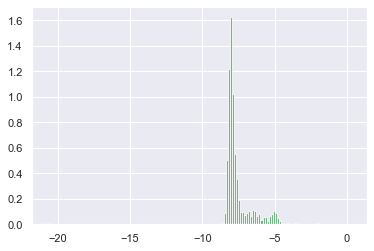

In [29]:
plt.hist(np.log((np.array(kl_dist)+10e-10)), bins=150, density=True, alpha=0.8, color='g')